# Método Runge-Kutta 4 en R

Salvador I. Márquez Flores

##### El objetivo es obtener una aproximación numérica al problema de una ecuación diferencial ordinaria con condiciones iniciales:

#### $\frac{dy}{dx}= f(x,y)$   ;  $\qquad x \in [a,b]$ , $\qquad con \quad y(a) = \alpha $

##### Se busca generar aproximaciones de la solución y(x) en los puntos de red distribuidos uniformemente (con un tamaño de paso h) en el intervalo [a,b] 

Primero, en R, debemos instalar la libreria "deSolve", usamos el comando install.packages( ) e introducimos el nombre del paquete que queremos instalar entre comillas.

In [ ]:
install.packages("deSolve")

In [2]:
# cargamos la libreria: deSolve
require(deSolve)

##### La estructura y sintaxis en R para resolver la ecuación diferencial con las condiciones señaladas, es de la forma: 

In [ ]:
model<-function(x,y,k)
 {
 with(as.list(c(y)),
  {
   dy<-f(x,y) # aquí se sustituye f(x,y) por la función que representa la ecuación diferencial que buscamos resolver.
   list(c(dy))})
 }
k<-ko   # k representa cualquier parámetro constante que requiera la ecuación, aquí se asigna su valor ko
malla<-seq(a,b,h) # aquí se asignan los valores que representan los puntos red, con tamaño de paso h en el intervalo [a,b]
out<-ode(func=model,y=c(y=α),times=malla,parms=k,method="rk4") # aquí y=c(y=α) representa la condición inicial del problema, 
                        # α se sustituye por el valor numérico de la condición inicial.
out

##### Ejemplo: Velocidad terminal en medios con arrastre.
La ecuación diferencial que rige la velocidad "v" de un cuerpo con masa "m" y área proyectada "A", que cae en un medio de densidad "ρ" es: 

> #### $\frac{dv}{dt}= g - \frac{\rho A v^{2}}{2m}$

El objeto adquiere su velocidad terminal de caída cuando no acelera más, es decir, cuando la derivada de la velocidad es cero. Suponga una moneda o un objeto, con m = 0.010 kg, A = 0.00031416 m², que cae de lo alto de un edificio, entonces ρ = 1 kg/m³ 

La ecuación diferencial queda como:

> #### $\frac{dv}{dt}= g - \frac{\rho A v^{2}}{2m} = g - \frac{1 (0.00031416) v^{2}}{2(0.010)} = g - 0.0157 v^{2}$  [m/s]

por simplicidad transformemos v → y, t → x, la ecuación diferencial queda como:
> #### $\frac{dy}{dx}= g - 0.0157 y^{2}$ , con k = 0.0157
> #### $\frac{dy}{dx}= g - k y^{2}$ , con $f(x,y) = g - k y^{2}$, con g = 9.81 y k = 0.0157
Como es caída libre la velocidad inicial es cero, queremos calcular la velocidad (v → y) cada segundo y determinar cuál es la velocidad terminal.

In [3]:
# Resolviendo en R
model<-function(x,y,k)
 {
 with(as.list(c(y)),
  {
   dy<- g-k*y^2  # se se sustituyo f(x,y) = g-k*y^2 
    list(c(dy))})
 }
g<-9.81 # g es la constante de la aceleración de la gravedad
k<-0.0157
malla<-seq(0,30,1) # intervalo de [0,30] con un paso de h = 1
out<-ode(func=model,y=c(y=0),times=malla,parms=k,method="rk4") # velocidad inicial nula y=c(y=0)
out

time,y
0,0.000000
1,9.333482
2,16.378421
3,20.650407
4,22.909201
5,24.018535
6,24.543776
7,24.788173
8,24.900974
9,24.952841


Se observa que la velocidad aumenta hasta aproximadamente el segundo 24 que alcanza su valor máximo, es decir llega a la velocidad terminal que es de 24.996815 m/s

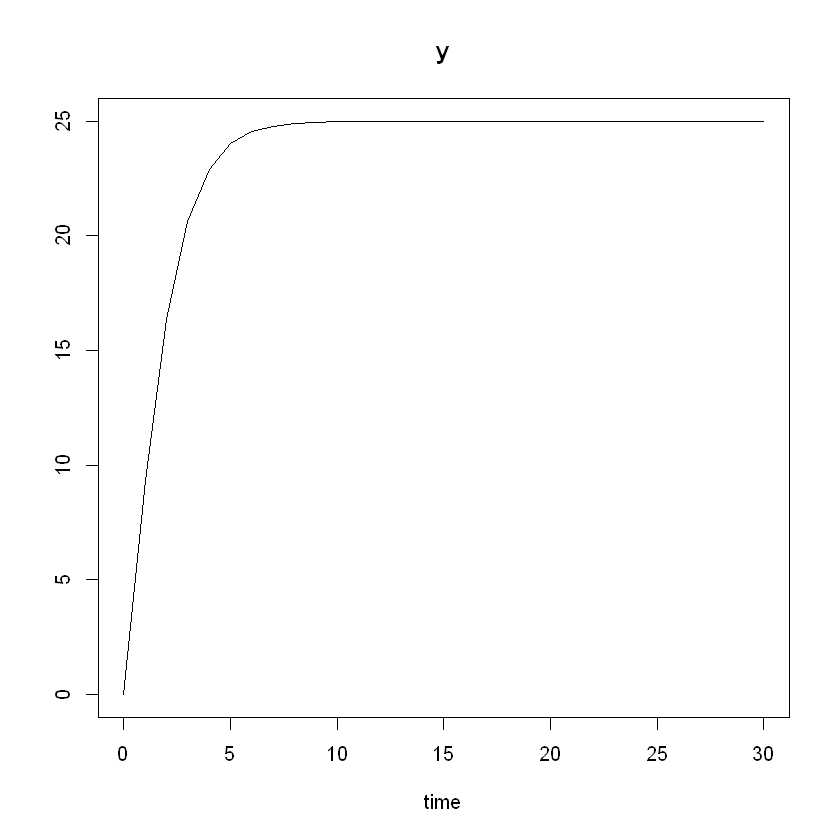

In [4]:
#graficando la velocidad cada segundo en el intervalo calculado:
plot(out)